In [34]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data 
y = iris.target  
data = pd.DataFrame(X, columns=iris.feature_names)
data['species'] = y
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [17]:
!pip install minisom


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from minisom import MiniSom
import numpy as np
som = MiniSom(x=5, y=5, input_len=4, sigma=1.0, learning_rate=0.1)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, num_iteration=100)
labels = np.array([som.winner(x) for x in X_scaled])

In [38]:
unique_labels = {str(label): idx for idx, label in enumerate(np.unique([str(l) for l in labels]))}
cluster_labels = np.array([unique_labels[str(label)] for label in labels])
data = pd.DataFrame(X, columns=iris.feature_names)
data['species'] = y
data['Cluster'] = cluster_labels
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Cluster
0,5.1,3.5,1.4,0.2,0,18
1,4.9,3.0,1.4,0.2,0,7
2,4.7,3.2,1.3,0.2,0,18
3,4.6,3.1,1.5,0.2,0,5
4,5.0,3.6,1.4,0.2,0,15


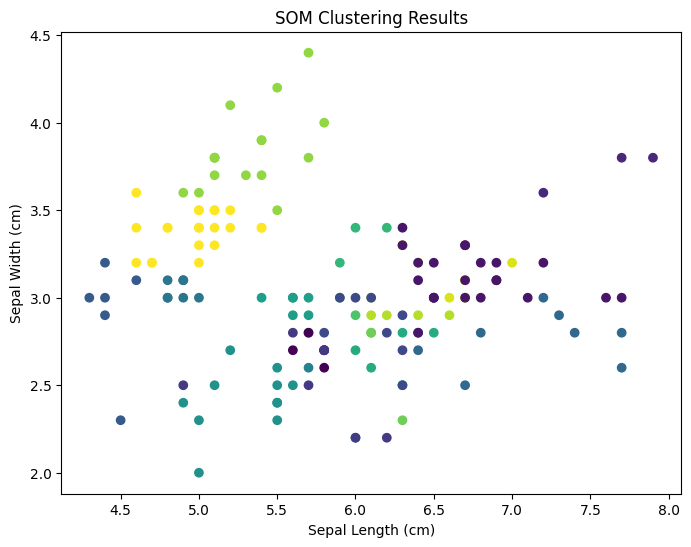

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data['Cluster'], cmap='viridis')
plt.title("SOM Clustering Results")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y, data['Cluster'])
print(f"Accuracy: {accuracy}")
conf_matrix = confusion_matrix(y, data['Cluster'])
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.02
Confusion Matrix:
 [[ 0  0  0  0  0  6  0  7  0  0  0  0  0  0  0 16  0  0 21]
 [ 5  0  0  1  0  0  1  0  1 12  6  3  2  3  3  0  5  8  0]
 [ 0 22  3  6  8  0  8  0  0  0  0  2  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  